# As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of 5.00 dollars per customer.

## Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [1]:
# import modules
import acquire
import prepare
import wrangle
import explore

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# acquire the telco churn raw data
df = wrangle.prep_telco_df()

# take a look transposed to see all columns
df.head(1).T

No duplicates found.
Dummy variables for gender created as "male".
Yes/No column values changed to boolean, 0 as no and 1 as yes
Combined variable for phone_service + multiple lines created.
Combined variable for partner + dependents created.
Simplified features: security, backup, protection, support, and payment type.
Column for service type added.
Added feature for tenure in years.
Converted total_charges to float for easier manipulation.
Data prep complete.




,0
senior_citizen,0.00
tenure_months,9.00
phone_service,2.00
internet_service_type_id,1.00
online_security,0.00
online_backup,0.00
device_protection,0.00
tech_support,0.00
streaming_tv,0.00
streaming_movies,1.00


In [2]:
train, validate, test = wrangle.train_validate_test(df)

train shape:  (5070, 21) , validate shape:  (1268, 21) , test shape:  (705, 21)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [3]:
plt.rc('font',size=13)
plt.rc('figure',figsize=(13,7))

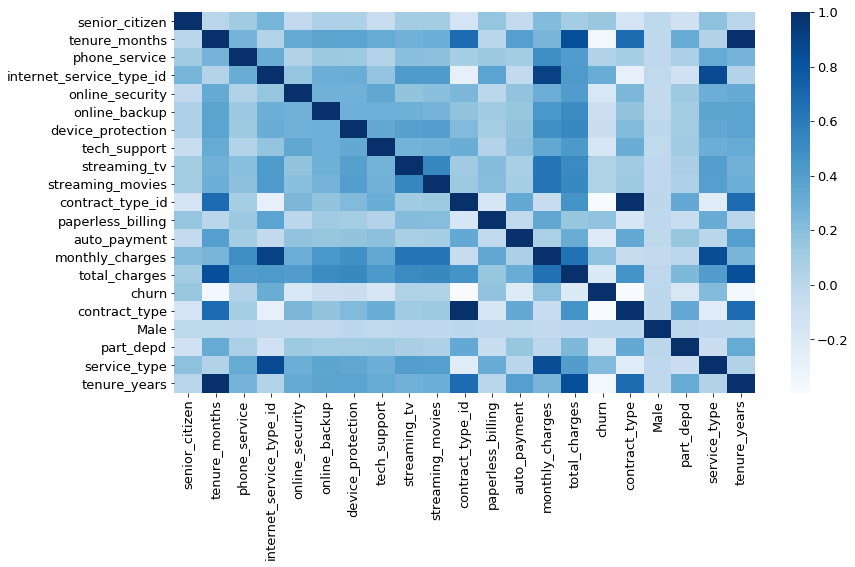

In [4]:
corr = train.corr()
sns.heatmap(corr,cmap='Blues')

In [5]:
train = train[['monthly_charges','tenure_years','total_charges']]
train['tenure_years'] = train.tenure_years.astype(int)

In [6]:
train.head()

,monthly_charges,tenure_years,total_charges
855,51.75,0,201.10
2823,81.95,0,81.95
5656,19.95,0,19.95
1016,49.20,1,571.15
1175,54.50,3,2076.05


### 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

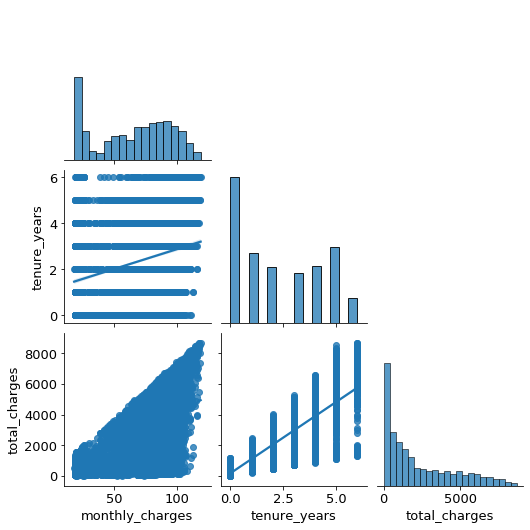

In [7]:
def df_pairplot(df):
    g = sns.pairplot(
        data = df,
        corner=True,
        kind='reg',
        diag_kind="hist")
    
explore.df_pairplot(train)

### 2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
def months_to_years(df):
    df['tenure_years'] = (train.tenure_months / 12).astype(int)
    return df

# df = months_to_years(df)

### 3. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [9]:
def plot_categorical_and_continuous_vars(df, catagorical_var, continuous_var):
    sns.barplot(data=df, y=continuous_var, x=catagorical_var)
    plt.show()
    sns.violinplot(data=df, y=continuous_var, x=catagorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=catagorical_var)

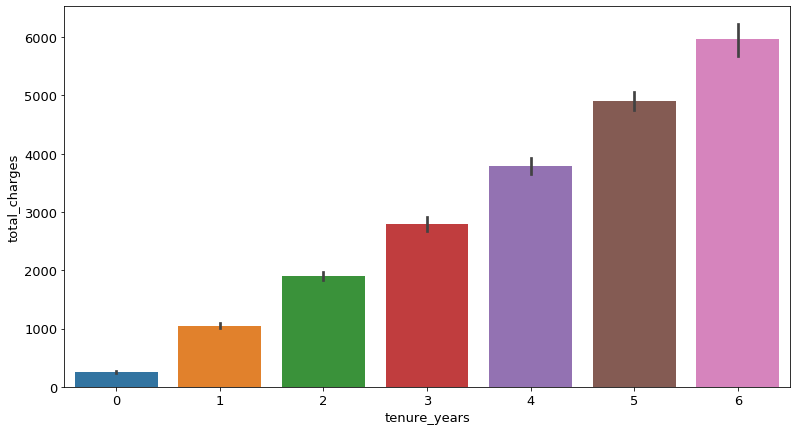

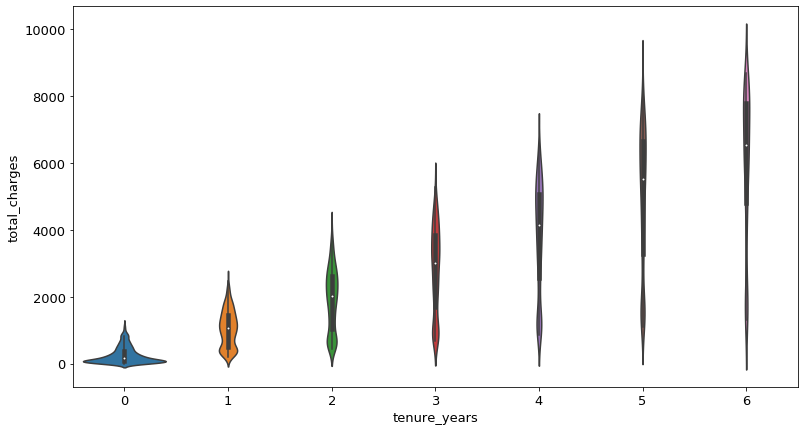

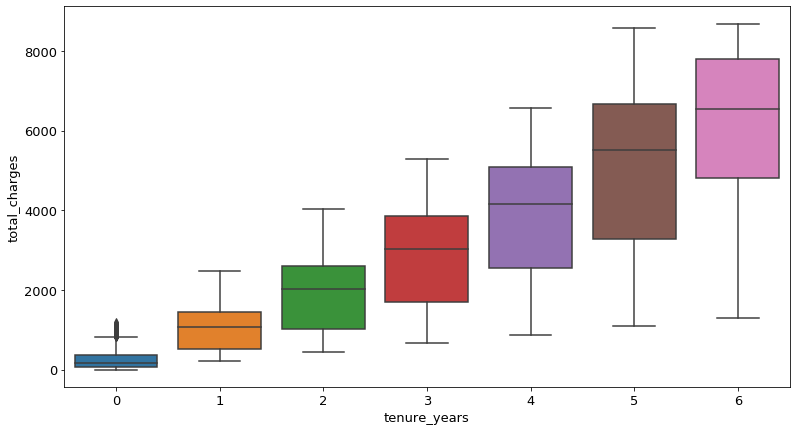

In [10]:
explore.plot_categorical_and_continuous_vars(train,'tenure_years','total_charges')

### 4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

### 5. Explore your dataset with any other visualizations you think will be helpful.

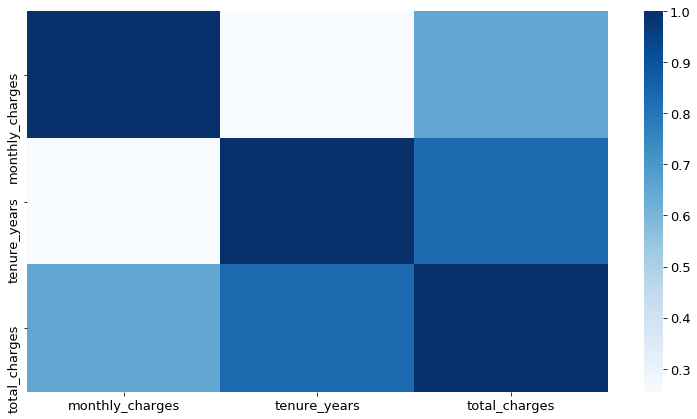

In [14]:
sns.heatmap(train.corr(), cmap='Blues')

## In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.